In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
Mental = pd.read_csv("Mental.csv")
Mental.head()

Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             08/19/2020           08/31/2020   19.4   19.0    19.8   
1             08/19/2020           08/31/2020   18.7   17.2    20.3   
2             08/19/2020           08/31/2020   18.3   17.3    19.2   
3             08/19/2020           08/31/2020   20.4   19.5    21.3   
4             08/19/2020           08/31/2020   21.2   20.2    22.2   

  Confidence Interval Quartile Range  Suppression Flag  
0         19.0 - 19.8            NaN               NaN  
1         17.2 - 20.3            NaN               NaN  
2         17.3 - 19.2            NaN               NaN  
3         19.5 - 21.3            NaN               NaN  
4         20.2 - 22.2            NaN               NaN

<Axes: xlabel='Time Period Label', ylabel='Value'>

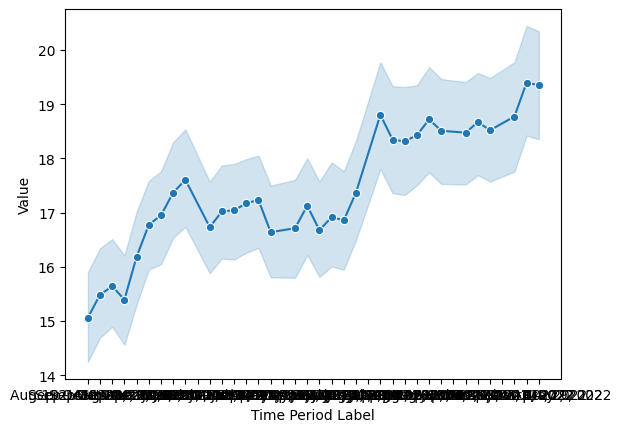

In [52]:
sns.lineplot(data= Mental, x="Time Period Label", y="Value", marker="o")

In [53]:
age_df = Mental[
    (Mental["Group"] == "By Age") &
    (Mental["Indicator"] == "Took Prescription Medication for Mental Health, Last 4 Weeks") &
    (Mental["State"] == "United States") 
]
avg_by_age = age_df.groupby("Subgroup")["Value"].mean().reset_index()  
sns.barplot(data=avg_by_age, x="Value", y="Subgroup") 

<Axes: xlabel='Value', ylabel='Subgroup'>

In [54]:
df = Mental[Mental["Group"] == "By Age"]  # You can change this to other groups if needed

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Phase", y="Value", hue="Subgroup")
plt.title("Avg Medication Usage by Phase (by Age)")
plt.xlabel("Phase")
plt.ylabel("Usage (%)")
plt.legend(title="Age Group",loc='upper left')
plt.show()

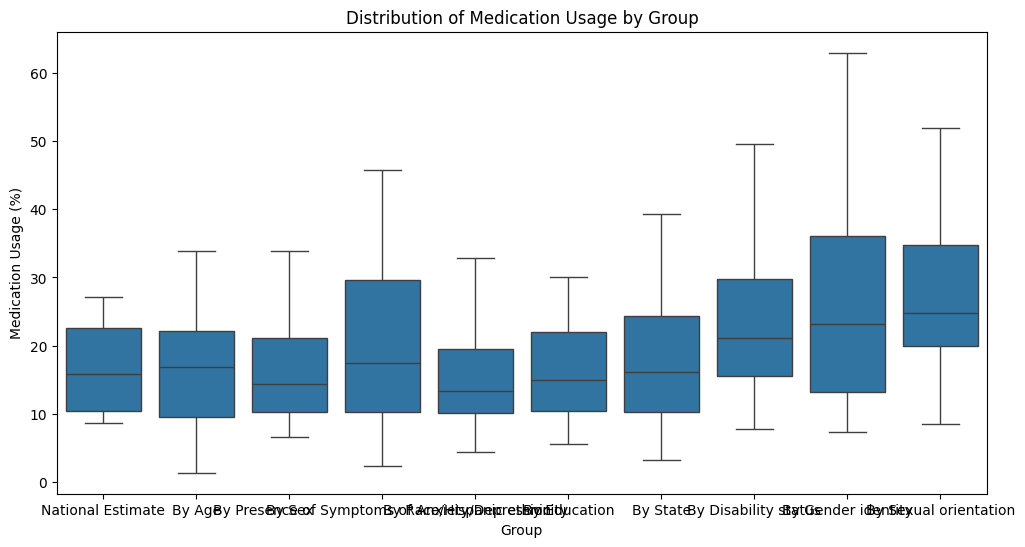

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Mental, x="Group", y="Value",)
plt.title("Distribution of Medication Usage by Group")
plt.xlabel("Group")
plt.ylabel("Medication Usage (%)")
plt.show()

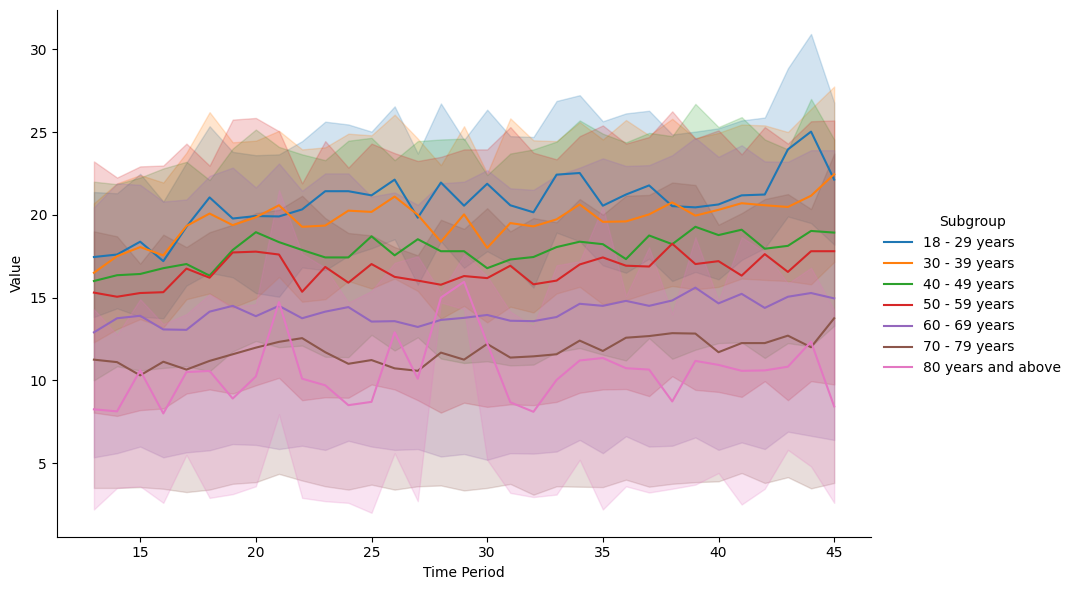

In [57]:
sns.relplot(data=df, x="Time Period", y="Value", hue="Subgroup", kind="line", height=6, aspect=1.5)
plt.show()

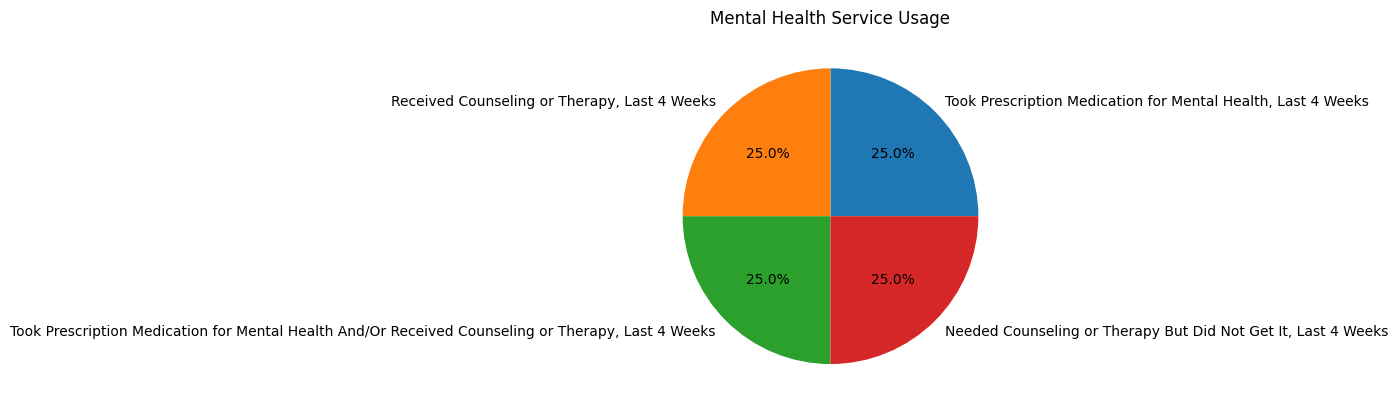

In [58]:
counts = df['Indicator'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Mental Health Service Usage")
plt.show()

In [60]:
plt.hist(df['Value'].dropna(), bins=20, color='skyblue',edgecolor='black')
plt.title("Mental Health Value Distribution")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.show()